In [1]:
# Import the necessary libraries.

In [36]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from scipy.stats import linregress


In [3]:
# Load the we_fn_use_c_marketing_customer_value_analysis.csv 
# into the variable customer_df (i.e. customer_df = pd.readcsv(""))
customer_df = pd.read_csv("/Users/ben/Desktop/Ironhack Bootcamp/Iron-ben/we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
# First, look at its main features head.
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# First, look at its main features shape.
customer_df.shape

(9134, 24)

In [6]:
# First, look at its main features info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# Rename the columns so they follow the PE8 (snake case).
customer_df = customer_df.rename(columns=str.lower)

In [8]:
customer_df.columns = customer_df.columns.str.replace(' ', '_', regex=False)

In [9]:
customer_df.columns = customer_df.columns.str.strip()

In [10]:
customer_df.rename(columns={'employmentstatus': 'employment_status'}, inplace=True)

In [11]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [12]:
# Fix the data types of any other column/columns as you might see necessary. 
# In our case I will change tranform effective to date from object to a date type

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')


In [13]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


/var/folders/y2/fs16ykvn22g71kvky3lq6x340000gn/T/ipykernel_43200/3435512858.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer_df.corr()


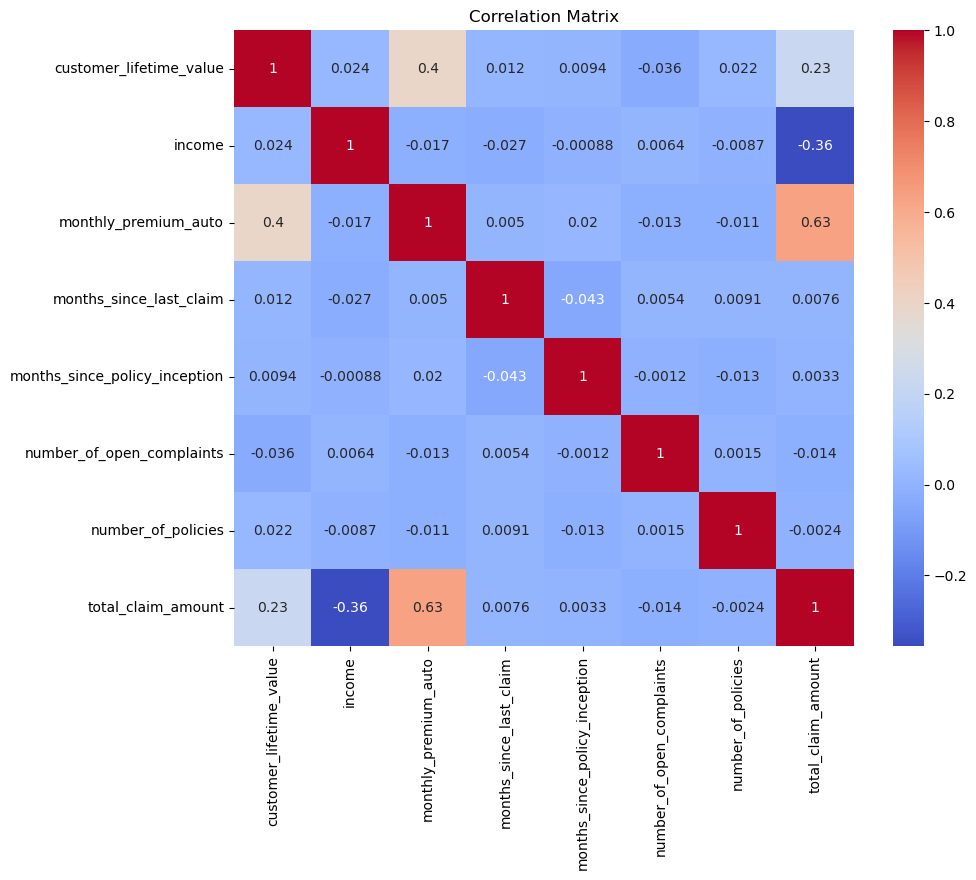

In [14]:
# Plot a correlation matrix, and comment on what you observe.
correlation_matrix = customer_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Commets: When the 'monthly_premium_auto' goes up, the 'total_claim_amount' also tends to go up. They are connected and move together. But remember, this doesn't mean one causes the other. There could be other reasons why they go up or down together. For example 

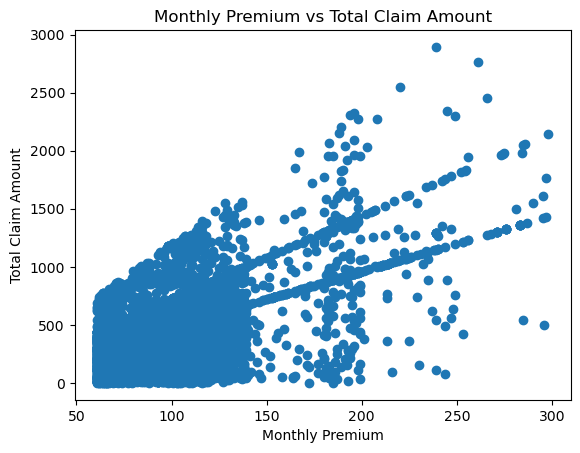

In [34]:
plt.scatter(customer_df['monthly_premium_auto'], customer_df['total_claim_amount'])
plt.xlabel('Monthly Premium')
plt.ylabel('Total Claim Amount')
plt.title('Monthly Premium vs Total Claim Amount')
plt.show()

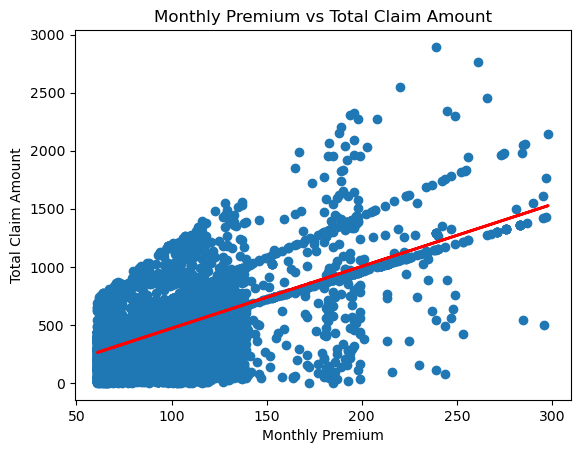

In [37]:
x = customer_df['monthly_premium_auto']
y = customer_df['total_claim_amount']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

plt.scatter(x, y)
plt.plot(x, intercept + slope * x, color='red', linewidth=2)

plt.xlabel('Monthly Premium')
plt.ylabel('Total Claim Amount')
plt.title('Monthly Premium vs Total Claim Amount')

plt.show()

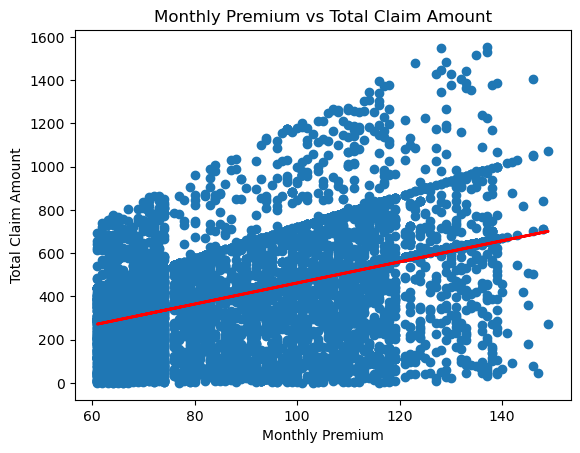

In [38]:
# Filter the data based on monthly premium under 150
filtered_df = customer_df[customer_df['monthly_premium_auto'] < 150]

x = filtered_df['monthly_premium_auto']
y = filtered_df['total_claim_amount']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

plt.scatter(x, y)
plt.plot(x, intercept + slope * x, color='red', linewidth=2)

plt.xlabel('Monthly Premium')
plt.ylabel('Total Claim Amount')
plt.title('Monthly Premium vs Total Claim Amount')

plt.show()



## Coments:
There is a high positive correlation between the Total Claim amount and Monthly premium when we look at monthly premium policies under 150.
But if you look at the first scatterplot, we will see that the correlation is more scatter.

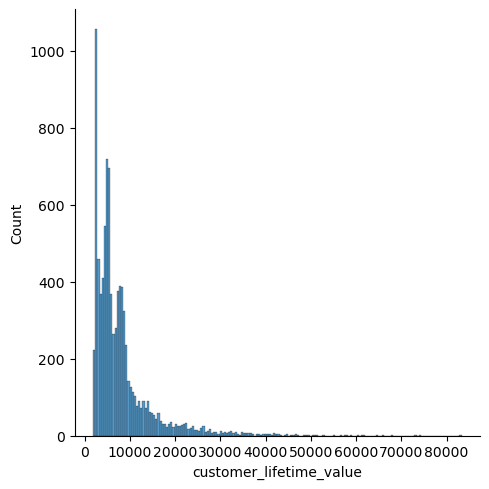

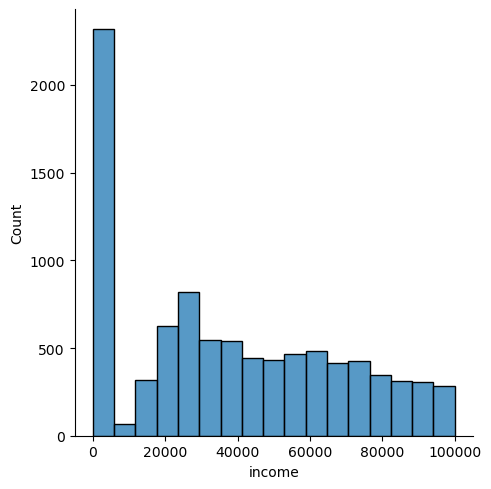

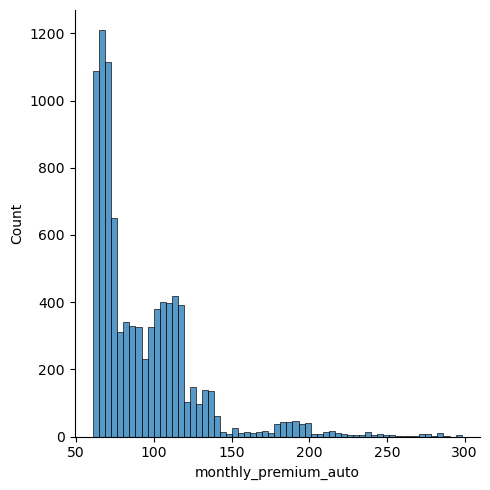

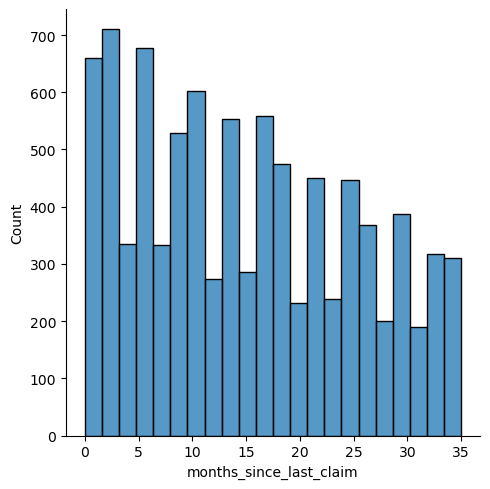

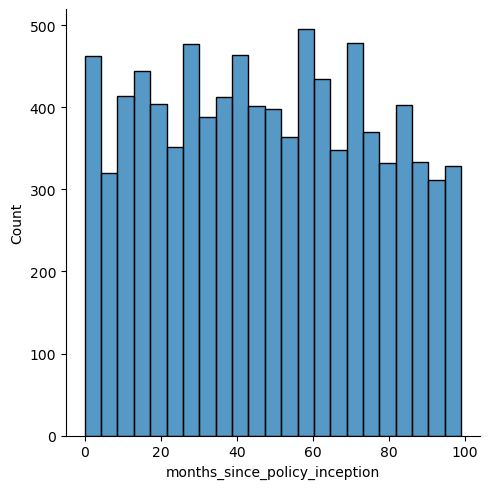

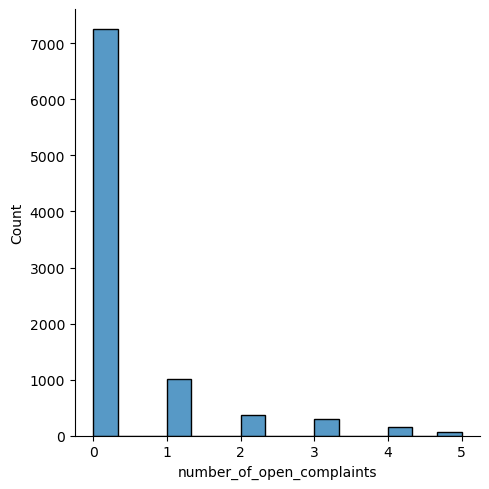

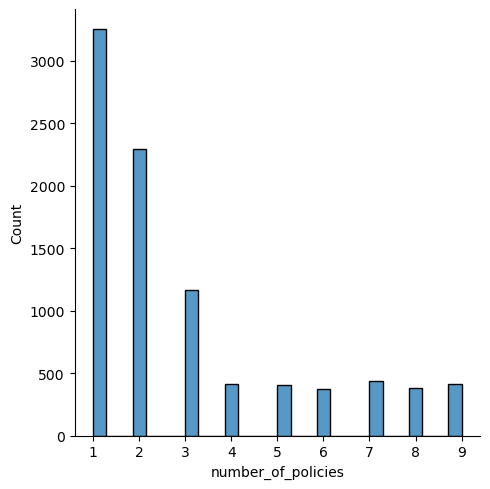

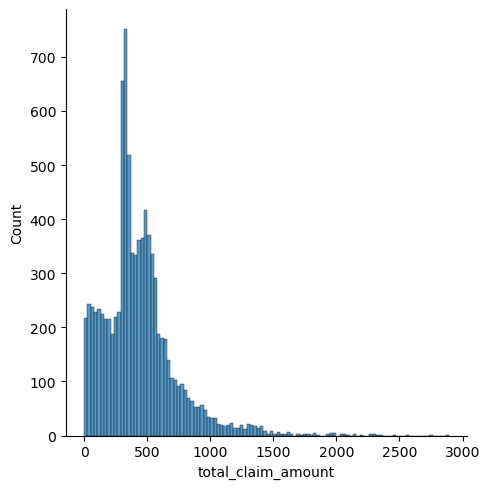

In [17]:
# Plot every continuous variable. Comment what you can see in the plots.

for col in customer_df.select_dtypes(np.number):
    sns.displot(customer_df[col])
    plt.show()

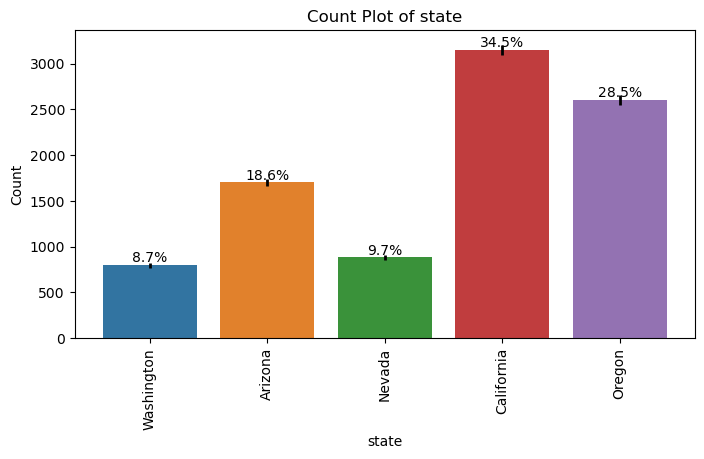

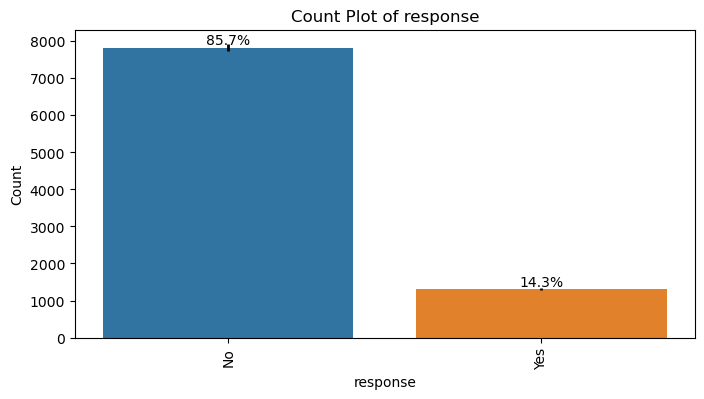

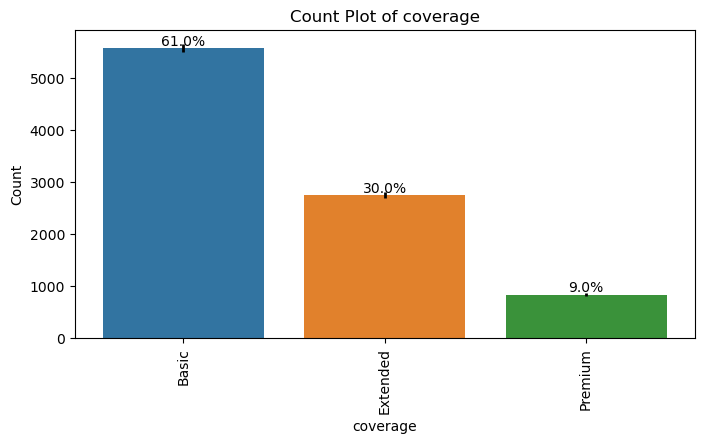

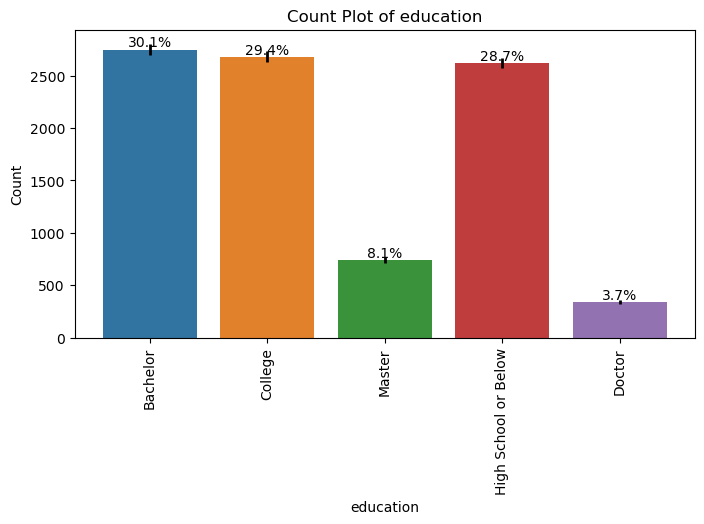

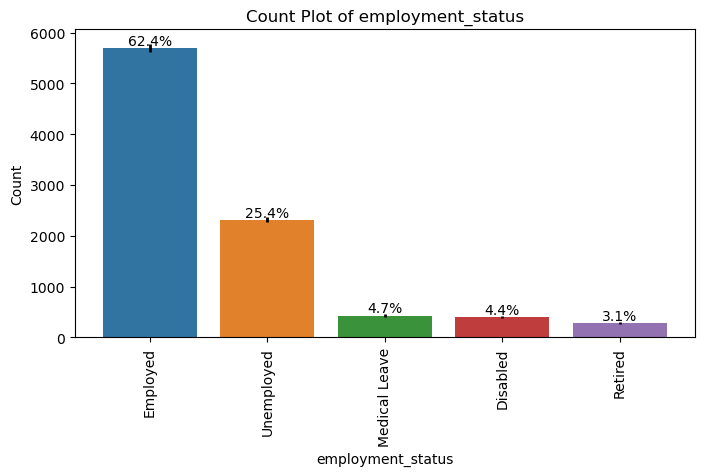

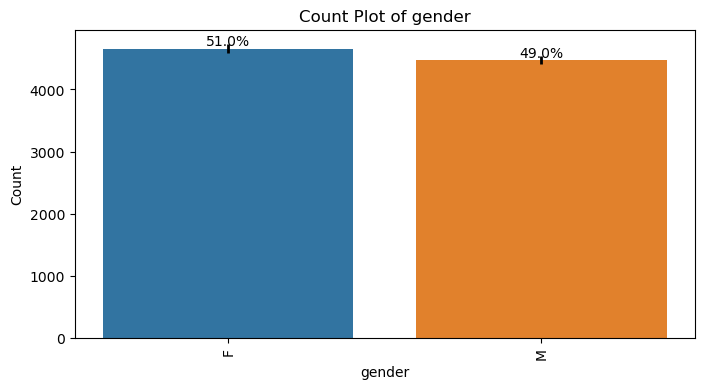

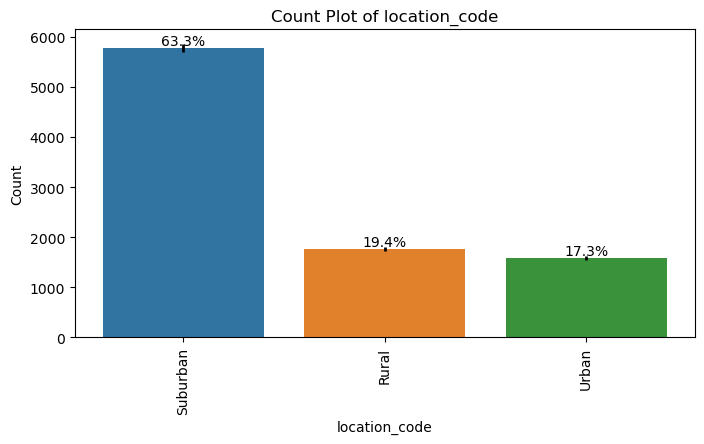

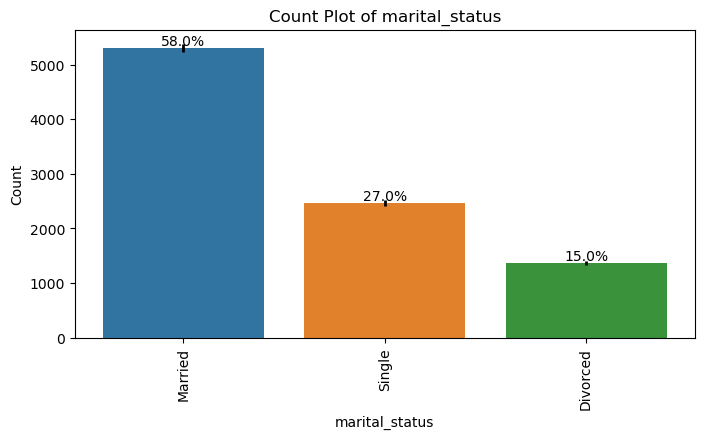

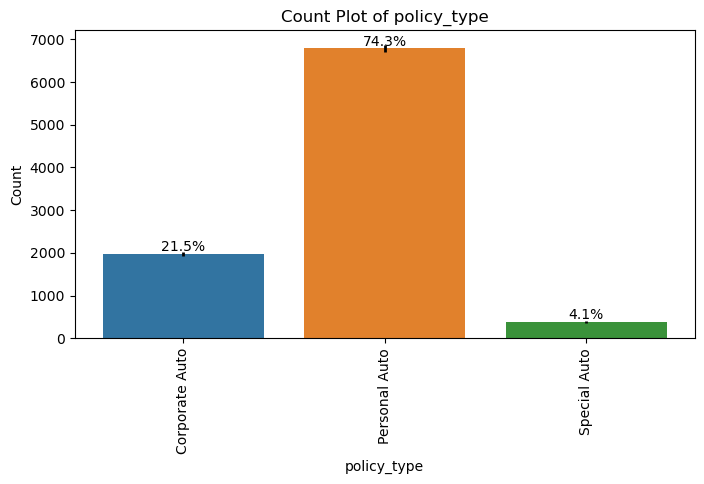

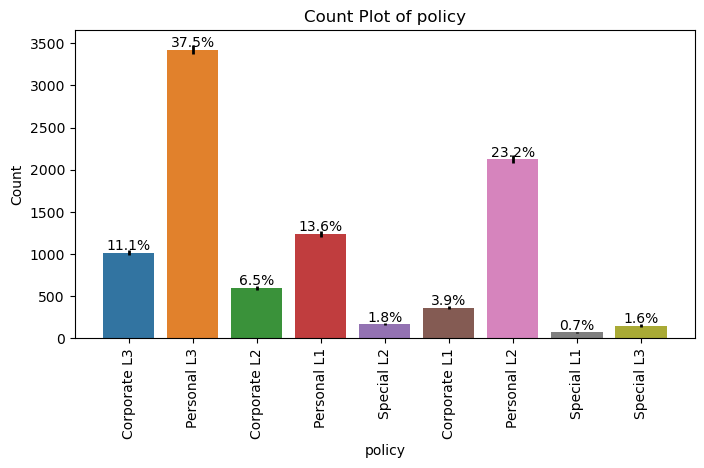

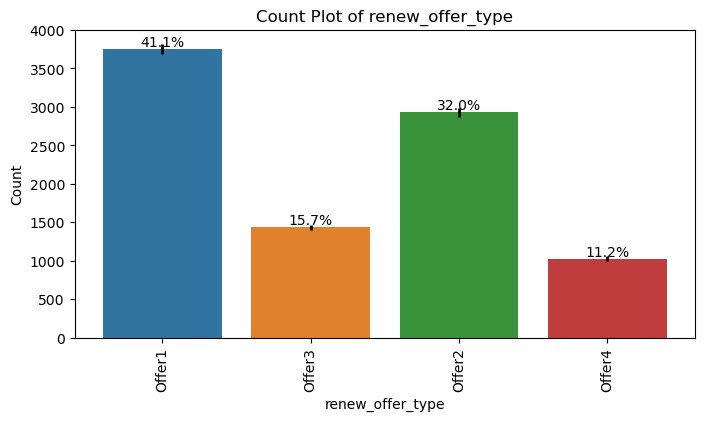

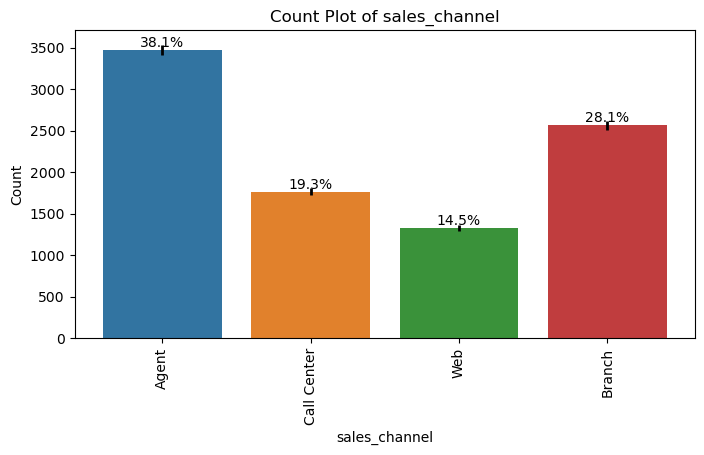

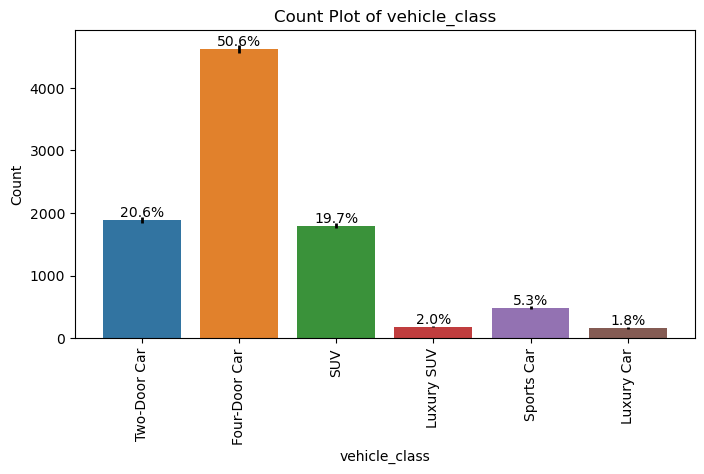

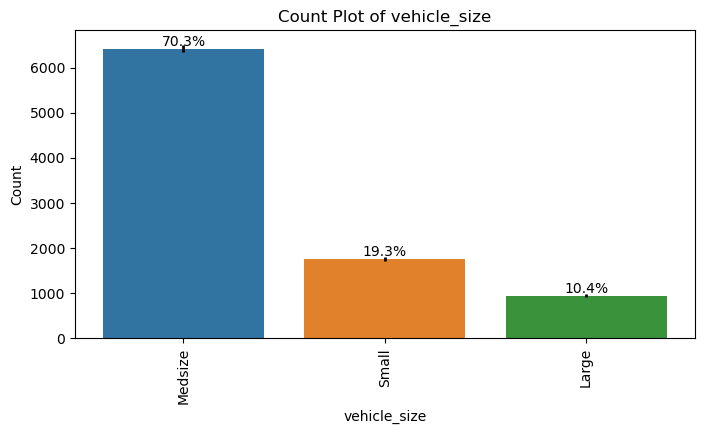

In [28]:
# Do the same with the categorical variables (be careful, you may need to change the plot type 
# to one better suited for continuous data!). Comment what you can see in the plots. 
# You should also delete the column customer_id before you can try to use a for loop on all 
# the categorical columns. Discuss why is deleting the column customer_id required. 
# Hint: Use bar plots to plot categorical data, with each unique category in the column on the 
# x-axis and an appropriate measure on the y-axis.

categorical_vars = customer_df.select_dtypes(include='object').columns
for column in categorical_vars:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=customer_df, x=column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=90)

    # Add percentage labels
    total = len(customer_df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    # Calculate deviation
    categories = customer_df[column].unique()
    deviations = []
    for category in categories:
        count = customer_df[customer_df[column] == category][column].count()
        deviation = np.sqrt(count)
        deviations.append(deviation)

    # Add error bars with increased linewidth
    ax.errorbar(range(len(categories)), [p.get_height() for p in ax.patches], yerr=deviations, fmt='none', color='black', linewidth=2)

    plt.show()

## Coments:

**State**
34.5% of our customers are from California 
28.5% of our customers are from Oregon 
18.6% of our customers are from Arizona 
That means that 79.6% of our customers are from these three states and the remaning 20.1% are from Washington and Nevada.


**Coverage**
61% of our customers have a basic coverage.

**Education**
71.3% of our customers have High Education, while just 28.7% have a "lower education" (High School or Below).

**Employment_status**
62.4% of our customers are Employed, while 25.4% of our customers are Unemployed. The reaming 12,2% are not working due to Medical Leave, Disabled, and Retirement. 

**Gender**
63.3% of our customer lives in suburban areas, while the remaining 36.7% live in Rural and Urban areas.

**Marital status**
58% of our customers are married 
27% are single, and 15% are divorced.

**Policy type**
74.3% of our customers have Personal Auto Policy
21.5% have a Corporate Auto, and 4.1% have a Special Auto Policy.

**Renew Offer Type**
41.1% of our customers got the Offer1
32% got the Offer2
and the reaming 26.9% got an offer3 or offer4.

**Sales Channel**
38.1 % of our sales are from agents
28.1 % of our sales are from our Branches
19.3% of our sales are from Call Center
14.4 % of our sales are from our Website

**Vehicle Class**
50.6% of the cars are Four-Door Car
20.6% of the cars are Tow-Door Car
19.7% of the cars are SUV
9.1% of the reaming cars are: Sport car(5.3%), Luxury SUV(2%) and Luxury Car (1.8%)

**Vehicle Size**
70.3% of the cars are Medsize size
19.3% of the cars are Small size
10.4% of the cars are Large 
		

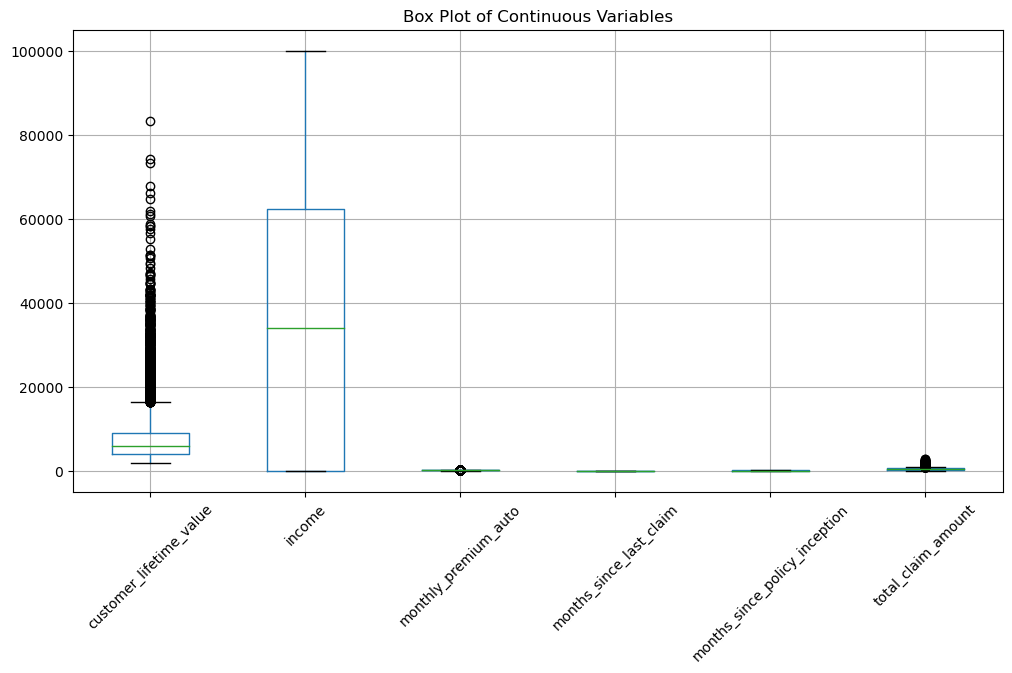

In [42]:
# Select the continuous variables
continuous_vars = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']

# Create box plots for each continuous variable
plt.figure(figsize=(12, 6))
customer_df[continuous_vars].boxplot()
plt.title('Box Plot of Continuous Variables')
plt.xticks(rotation=45)
plt.show()



## COMENTS:
We can see that majority of the outliears are in cusomter_lifetime_value

In [43]:
## Check all columns for NaN values. Decide what (if anything) you will need to do with them.
customer_df.isnull().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64